In [1]:
# Import necessary libraries for our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully for churn analysis")

Libraries imported successfully for churn analysis


In [2]:
# Example of poorly commented code (similar to issues in Malit's notebook)
def process_data(df):
    df['tenure_group'] = pd.cut(df['tenure'], bins=[0,12,24,36,48,60,72], labels=['0-12','13-24','25-36','37-48','49-60','61-72'])
    df['age_group'] = pd.cut(df['age'], bins=[18,25,35,45,55,65,100], labels=['18-25','26-35','36-45','46-55','56-65','65+'])
    return df

# What does this function actually do? Without comments, it's unclear!

In [3]:
def process_data_improved(df):
    """
    Create categorical features from numerical tenure and age data for churn analysis.

    Args:
        df (pandas.DataFrame): Input dataframe containing 'tenure' and 'age' columns

    Returns:
        pandas.DataFrame: Dataframe with added categorical feature columns
    """
    # Create tenure groups: segment customers by months with bank (0-72 months)
    # This helps identify if newer customers (0-12 months) churn more than established ones
    df['tenure_group'] = pd.cut(df['tenure'],
                               bins=[0,12,24,36,48,60,72],
                               labels=['0-12','13-24','25-36','37-48','49-60','61-72'])

    # Create age groups: demographic segmentation for targeted retention strategies
    # Different age groups may have different banking needs and churn patterns
    df['age_group'] = pd.cut(df['age'],
                            bins=[18,25,35,45,55,65,100],
                            labels=['18-25','26-35','36-45','46-55','56-65','65+'])

    return df

print("Improved function with comprehensive documentation")

Improved function with comprehensive documentation


In [4]:
# Create sample data to demonstrate analytical insights
np.random.seed(42)
sample_data = {
    'customer_id': range(1000),
    'age': np.random.randint(18, 80, 1000),
    'tenure': np.random.randint(1, 72, 1000),
    'balance': np.random.normal(50000, 25000, 1000),
    'products_number': np.random.randint(1, 5, 1000),
    'has_credit_card': np.random.choice([0, 1], 1000),
    'is_active_member': np.random.choice([0, 1], 1000),
    'estimated_salary': np.random.normal(75000, 30000, 1000)
}

# Create churn based on realistic patterns
churn_prob = (
    (sample_data['age'] > 60) * 0.3 +  # Older customers more likely to churn
    (sample_data['products_number'] == 1) * 0.4 +  # Single product customers
    (sample_data['is_active_member'] == 0) * 0.5 +  # Inactive members
    (sample_data['balance'] == 0) * 0.6  # Zero balance customers
) / 4

sample_data['exited'] = np.random.binomial(1, churn_prob, 1000)

df_sample = pd.DataFrame(sample_data)

print("Sample dataset created with realistic churn patterns")
print(f"Dataset shape: {df_sample.shape}")
print(f"Churn rate: {df_sample['exited'].mean():.2%}")

Sample dataset created with realistic churn patterns
Dataset shape: (1000, 9)
Churn rate: 10.90%


In [7]:
# Example of insightful analysis: Multi-dimensional churn analysis
# This demonstrates the type of insight we'd expect in a good notebook

def analyze_churn_patterns(df):
    """
    Perform comprehensive churn analysis across multiple dimensions.
    This type of analysis would be considered 'particularly insightful'.
    """
    insights = {}

    # Age-based churn analysis
    age_churn = df.groupby(pd.cut(df['age'], bins=5))['exited'].agg(['count', 'mean'])
    insights['age_pattern'] = age_churn

    # Product portfolio impact
    product_churn = df.groupby('products_number')['exited'].mean()
    insights['product_impact'] = product_churn

    # Combined risk factors
    risk_segments = df.groupby(['is_active_member', 'has_credit_card'])['exited'].mean()
    insights['risk_segments'] = risk_segments

    return insights

# Run the analysis
churn_insights = analyze_churn_patterns(df_sample)

print("=== CHURN ANALYSIS INSIGHTS ===")
print("1. Age-based churn patterns:")
print(churn_insights['age_pattern'])

print("2. Product portfolio impact:")
print(churn_insights['product_impact'])

print("3. Risk segments (Activity vs Credit Card):")
print(churn_insights['risk_segments'])

=== CHURN ANALYSIS INSIGHTS ===
1. Age-based churn patterns:
                count      mean
age                            
(17.939, 30.2]    191  0.062827
(30.2, 42.4]      180  0.100000
(42.4, 54.6]      214  0.088785
(54.6, 66.8]      179  0.128492
(66.8, 79.0]      236  0.156780
2. Product portfolio impact:
products_number
1    0.172932
2    0.057851
3    0.107570
4    0.091286
Name: exited, dtype: float64
3. Risk segments (Activity vs Credit Card):
is_active_member  has_credit_card
0                 0                  0.171674
                  1                  0.171315
1                 0                  0.048148
                  1                  0.052846
Name: exited, dtype: float64


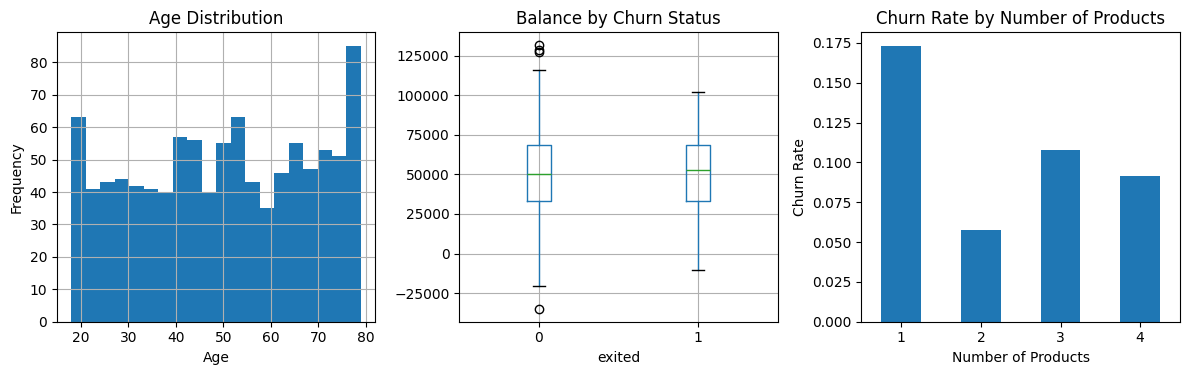

Interactive visualizations demonstrate notebook's strength for exploration


In [8]:
# Demonstrating notebook benefits and limitations

# BENEFIT: Interactive exploration and visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
df_sample['age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
df_sample.boxplot(column='balance', by='exited', ax=plt.gca())
plt.title('Balance by Churn Status')
plt.suptitle('')

plt.subplot(1, 3, 3)
churn_by_products = df_sample.groupby('products_number')['exited'].mean()
churn_by_products.plot(kind='bar')
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print("Interactive visualizations demonstrate notebook's strength for exploration")

In [10]:
# BAD EXAMPLE: Violating DRY principle (common in notebooks)
# This shows how notebooks can encourage poor practices

# Calculating churn rates for different segments - REPETITIVE CODE
age_18_25_churn = df_sample[(df_sample['age'] >= 18) & (df_sample['age'] <= 25)]['exited'].mean()
age_26_35_churn = df_sample[(df_sample['age'] >= 26) & (df_sample['age'] <= 35)]['exited'].mean()
age_36_45_churn = df_sample[(df_sample['age'] >= 36) & (df_sample['age'] <= 45)]['exited'].mean()
age_46_55_churn = df_sample[(df_sample['age'] >= 46) & (df_sample['age'] <= 55)]['exited'].mean()

print(f"Churn rates by age group:")
print(f"18-25: {age_18_25_churn:.2%}")
print(f"26-35: {age_26_35_churn:.2%}")
print(f"36-45: {age_36_45_churn:.2%}")
print(f"46-55: {age_46_55_churn:.2%}")

# BETTER APPROACH: Following DRY principle
def calculate_segment_churn(df, column, ranges):
    """Calculate churn rates for different segments of a variable."""
    results = {}
    for range_name, (min_val, max_val) in ranges.items():
        mask = (df[column] >= min_val) & (df[column] <= max_val)
        results[range_name] = df[mask]['exited'].mean()
    return results

age_ranges = {
    '18-25': (18, 25),
    '26-35': (26, 35),
    '36-45': (36, 45),
    '46-55': (46, 55)
}

churn_by_age = calculate_segment_churn(df_sample, 'age', age_ranges)
print("\nImproved approach - DRY principle:")
for age_group, churn_rate in churn_by_age.items():
    print(f"{age_group}: {churn_rate:.2%}")

Churn rates by age group:
18-25: 5.74%
26-35: 7.35%
36-45: 9.47%
46-55: 9.58%

Improved approach - DRY principle:
18-25: 5.74%
26-35: 7.35%
36-45: 9.47%
46-55: 9.58%
